# Multiclass classification to predict the Efficacy of an active G9a inhibitor using dataset 1
https://scikit-learn.org/stable/modules/multiclass.html

### Content   <a name="content"></a>

1. [Data loading and observations](#1)
2. [Dividing the range of efficacy into four classes](#2)
3. [Balancing data ](#3)
4. [ML with Random Forest Classifier](#4)
5. [Overfitting exploration](#5)
6. [Feature importance. Two methods comparison](#6)
7. [Final result](#7)

## Data loading and observations <a name="1"></a>

In [1]:
# pip install modin[ray] 
# pip install sidetable

In [2]:
import pandas as pd 

# # loading the dataset for the regression ML
df = pd.read_csv('data_Efficacy_no_solub.csv', index_col=[0])
# Avoid some columns to be truncated during df display
pd.set_option('display.max_columns', None)
# Display the data frame
print('Shape of df: ', df.shape)
df.head()

Shape of df:  (27323, 60)


,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity
0,163.3340,435.5,117.0,22.8,31,2,5,7,1,17.8694,17.8694,20.082314,19.965107,10.8275,12.0275,19.912513,19.826117,0.195432,0.001865,17.5340,19.3722,20.172632,20.282350,6.6305,8.0824,19.572353,19.845644,3.5023,5.6490,20.488571,20.292375,32.824767,20.010407,20.190597,20.098098,0.41,0.45,0.04,0.02,0.09,0.0,0.0,0.00,63.43,5.79,7.35,7.36,16.08,0.0,0.0,0.00,21.650372,21.485712,2.644446,2.396838,5.006424,3.429315,1.893184,1.430767,20.052
1,109.5210,500.6,172.0,20.8,35,3,8,11,1,14.0287,14.0287,20.075508,20.076284,14.2560,15.4560,19.977489,19.986298,0.195432,0.000699,10.2185,12.2236,20.629553,20.386651,6.0154,7.8840,20.149252,20.288979,6.9525,8.3908,20.974558,20.550393,29.040476,20.170102,20.382104,20.119195,0.37,0.44,0.08,0.02,0.10,0.0,0.0,0.00,55.19,5.64,15.98,6.40,16.79,0.0,0.0,0.00,20.984056,20.907654,1.698723,1.550431,1.469759,1.456786,0.865214,0.939601,20.054
2,98.1573,449.4,151.0,22.0,31,4,9,6,1,6.5161,6.5161,19.840823,19.895281,18.7500,21.1500,20.088285,20.143002,12.507661,0.037176,11.0932,13.3081,20.335645,20.467170,6.4155,8.2934,19.551476,19.309144,2.4547,5.5169,19.860958,19.577412,162.225931,20.211769,21.251976,21.686218,0.42,0.31,0.07,0.02,0.11,0.0,0.0,0.07,50.78,3.14,10.68,7.13,15.58,0.0,0.0,12.68,20.347525,20.308090,1.729125,1.604662,4.519167,2.412242,2.613558,1.503272,20.049
3,146.9800,512.5,199.0,20.8,36,5,9,9,1,20.5259,21.5663,19.950236,19.912669,14.1034,14.1034,20.128934,20.200037,0.083006,0.000517,11.5600,13.5814,20.346999,20.432999,10.3972,12.0706,19.550438,19.458557,2.8515,5.5493,19.617349,19.727582,83.276709,20.082873,20.223200,20.225223,0.38,0.40,0.10,0.02,0.10,0.0,0.0,0.00,53.90,4.72,18.73,6.26,16.40,0.0,0.0,0.00,21.455387,21.529156,1.111838,1.125164,4.054007,2.447408,3.646221,2.175157,20.052
4,163.0410,502.6,137.0,21.8,37,3,6,9,1,12.9638,12.9638,20.575062,20.532346,16.5215,17.7215,20.346460,20.176789,0.195432,0.003433,9.9702,11.1871,20.252543,20.277778,9.2767,10.4937,19.909155,20.111323,4.5327,6.8431,20.168788,20.318390,11.707530,20.002110,20.040380,20.026634,0.40,0.45,0.06,0.00,0.09,0.0,0.0,0.00,64.53,6.02,12.73,0.00,16.72,0.0,0.0,0.00,20.784662,20.731529,1.074757,1.066078,2.199616,1.634800,2.046617,1.533472,20.059


In [3]:
# Check for NaN
df.isnull().values.any()

False

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27323 entries, 0 to 164
Data columns (total 60 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Efficacy            27323 non-null  float64
 1   MW                  27323 non-null  float64
 2   TPSA                27323 non-null  float64
 3   XL                  27323 non-null  float64
 4   HAC                 27323 non-null  int64  
 5   HBDC                27323 non-null  int64  
 6   HBAC                27323 non-null  int64  
 7   RBC                 27323 non-null  int64  
 8   CBUC                27323 non-null  int64  
 9   MMX6                27323 non-null  float64
 10  MMX                 27323 non-null  float64
 11  SX6                 27323 non-null  float64
 12  SX                  27323 non-null  float64
 13  MMY6                27323 non-null  float64
 14  MMY                 27323 non-null  float64
 15  SY6                 27323 non-null  float64
 16  SY         

In [5]:
df.describe(include="all")

,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity
count,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.0,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,2.732300e+04,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.00000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000
mean,130.817048,361.679559,91.025661,23.092483,25.147165,1.282729,5.153314,4.763569,1.0,10.771973,11.346082,20.026201,20.024996,9.286464,9.846514,19.975389,19.992414,6.539488,0.039406,11.322665,13.329239,20.004356,20.005516,5.604325,7.593329,19.998456,19.999140,2.952183,4.764932,20.001213,19.999929,6.295082e+01,20.372044,20.506639,20.485864,0.415877,0.419530,0.065801,0.017378,0.07106,0.001467,0.004540,0.004039,60.492773,5.226612,12.457340,6.271464,11.807595,1.106745,1.704213,0.931106,21.381739,21.321530,2.268995,1.854026,102.199583,31.093978,50.353342,19.970465,20.056554
std,30.314449,80.149490,34.855096,1.318537,5.657259,0.983037,1.849339,2.270493,0.0,3.653430,3.551080,0.313678,0.288993,3.614025,3.493136,0.381484,0.331885,42.573505,0.259385,2.876677,2.811440,0.322899,0.287727,1.862739,1.775259,0.459767,0.331879,1.319908,1.439797,0.568947,0.363984,7.942518e+01,1.359993,7.233649,7.090387,0.044337,0.060747,0.039261,0.020016,0.03614,0.006878,0.012809,0.015565,8.919100,1.388152,7.005158,6.772923,5.574678,4.920027,4.533172,3.344172,0.869477,0.702711,1.062784,0.608144,942.579899,445.365002,524.905055,314.857842,0.016953
min,31.129900,82.100000,0.000000,11.800000,6.000000,0.000000,0.000000,0.000000,1.0,0.583400,1.334900,18.442165,18.824699,0.375000,0.412500,18.482865,18.785181,0.000000,0.000000,0.975000,3.899900,18.534780,18.885661,0.166000,2.297600,17.726484,18.590198,0.000100,0.000300,16.402595,14.612511,1.161843e-07,20.000109,20.000000,20.000002,0.130000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,15.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.152146,20.158514,0.537249,0.752498,0.596586,0.908398,0.210874,0.683794,20.000000
25%,109.072500,304.765000,67.600000,22.300000,21.000000,1.000000,4.000000,3.000000,1.0,8.089200,8.832800,19.826250,19.835632,6.735800,7.358000,19.718901,19.765444,0.000000,0.000002,9.269550,11.305750,19.802707,19.814318,4.226300,6.252900,19.708923,19.793464,2.255950,4.036450,19.716906,19.827044,2.713871e+01,20.050375,20.042369,20.041538,0.390000,0.380000,0.040000,0.000000,0.05000,0.000000,0.000000,0.000000,54.760000,4.270000,7.650000,0.000000,8.040000,0.000000,0.000000,0.000000,20.818771,20.831248,1.512077,1.390404,2.856220,2.201813,1.433364,1.300203,20.048000
50%,129.606000,358.900000,88.000000,23.100000,25.000000,1.000000,5.000000,5.000000,1.0,10.393600,11.172300,20.013756,20.012651,9.067500,9.641500,19.980873,19.994495,0.082433,0.000190,11.127900,13.115800,19.999997,20.003445,5.517100,7.467500,20.000045,20.000040,2.793400,4.738600,20.000771,20.000487,4.261515e+01,20.125092,20.105960,20.104442,0.420000,0.420000,0.060000,0.020000,0.07000,0.000000,0.000000,0.000000,60.830000,5.150000,12.260000,6.920000,11.370000,0.000000,0.000000,0.000000,21.16

[<a href="#content">Back to top</a>]

## Dividing the range of efficacy into four classes <a name="2"></a>

In [6]:
# Efficacy min 31.1299
# Efficacy max 299.718
# Difference 268.5881
# 4 classes distinct by 67: from 31.1299 to 98; 165; 232; 299.718
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/#:~:text=To%20accomplish%20this%2C%20we%E2%80%99ll%20use%20numpy%E2%80%99s%20built-in%20where%28%29,condition%20is%20true%2C%20value%20if%20condition%20is%20false%29
import numpy as np

# Create a list of conditions
conditions = [
    (df['Efficacy'] <= 98),
    (df['Efficacy'] >98) & (df['Efficacy']<=165),
    (df['Efficacy'] >165) & (df['Efficacy']<=232),
    (df['Efficacy'] >232)
]

# Create a lsit of values
values = ['1', '2', '3', '4']

# Create a new column and use np.select to assign values to it using the lists as arguments
df['target'] = np.select(conditions, values)

# display the updated DataFrame
df.head() 

,Efficacy,MW,TPSA,XL,HAC,HBDC,HBAC,RBC,CBUC,MMX6,MMX,SX6,SX,MMY6,MMY,SY6,SY,Volume_1,Volume_2,MMX6_3D,MMX_3D,SX6_3D,SX_3D,MMY6_3D,MMY_3D,SY6_3D,SY_3D,MMZ6_3D,MMZ_3D,SZ6_3D,SZ_3D,Volume_1_3D,XY_3D_volume,XZ_3D_volume,YZ_3D_volume,C_relative,H_relative,O_relative,S_relative,N_relative,Br_relative,Cl_relative,F_relative,C,H,O,S,N,Br,Cl,F,C_rel_2D,allAtoms_rel_2D,C_rel_XY_3D,allAtoms_rel_XY_3D,C_rel_XZ_3D,allAtoms_rel_XZ_3D,C_rel_YZ_3D,allAtoms_rel_YZ_3D,Similarity,target
0,163.3340,435.5,117.0,22.8,31,2,5,7,1,17.8694,17.8694,20.082314,19.965107,10.8275,12.0275,19.912513,19.826117,0.195432,0.001865,17.5340,19.3722,20.172632,20.282350,6.6305,8.0824,19.572353,19.845644,3.5023,5.6490,20.488571,20.292375,32.824767,20.010407,20.190597,20.098098,0.41,0.45,0.04,0.02,0.09,0.0,0.0,0.00,63.43,5.79,7.35,7.36,16.08,0.0,0.0,0.00,21.650372,21.485712,2.644446,2.396838,5.006424,3.429315,1.893184,1.430767,20.052,2
1,109.5210,500.6,172.0,20.8,35,3,8,11,1,14.0287,14.0287,20.075508,20.076284,14.2560,15.4560,19.977489,19.986298,0.195432,0.000699,10.2185,12.2236,20.629553,20.386651,6.0154,7.8840,20.149252,20.288979,6.9525,8.3908,20.974558,20.550393,29.040476,20.170102,20.382104,20.119195,0.37,0.44,0.08,0.02,0.10,0.0,0.0,0.00,55.19,5.64,15.98,6.40,16.79,0.0,0.0,0.00,20.984056,20.907654,1.698723,1.550431,1.469759,1.456786,0.865214,0.939601,20.054,2
2,98.1573,449.4,151.0,22.0,31,4,9,6,1,6.5161,6.5161,19.840823,19.895281,18.7500,21.1500,20.088285,20.143002,12.507661,0.037176,11.0932,13.3081,20.335645,20.467170,6.4155,8.2934,19.551476,19.309144,2.4547,5.5169,19.860958,19.577412,162.225931,20.211769,21.251976,21.686218,0.42,0.31,0.07,0.02,0.11,0.0,0.0,0.07,50.78,3.14,10.68,7.13,15.58,0.0,0.0,12.68,20.347525,20.308090,1.729125,1.604662,4.519167,2.412242,2.613558,1.503272,20.049,2
3,146.9800,512.5,199.0,20.8,36,5,9,9,1,20.5259,21.5663,19.950236,19.912669,14.1034,14.1034,20.128934,20.200037,0.083006,0.000517,11.5600,13.5814,20.346999,20.432999,10.3972,12.0706,19.550438,19.458557,2.8515,5.5493,19.617349,19.727582,83.276709,20.082873,20.223200,20.225223,0.38,0.40,0.10,0.02,0.10,0.0,0.0,0.00,53.90,4.72,18.73,6.26,16.40,0.0,0.0,0.00,21.455387,21.529156,1.111838,1.125164,4.054007,2.447408,3.646221,2.175157,20.052,2
4,163.0410,502.6,137.0,21.8,37,3,6,9,1,12.9638,12.9638,20.575062,20.532346,16.5215,17.7215,20.346460,20.176789,0.195432,0.003433,9.9702,11.1871,20.252543,20.277778,9.2767,10.4937,19.909155,20.111323,4.5327,6.8431,20.168788,20.318390,11.707530,20.002110,20.040380,20.026634,0.40,0.45,0.06,0.00,0.09,0.0,0.0,0.00,64.53,6.02,12.73,0.00,16.72,0.0,0.0,0.00,20.784662,20.731529,1.074757,1.066078,2.199616,1.634800,2.046617,1.533472,20.059,2


In [7]:
df['target'].value_counts()

target
2    19841
1     4059
3     3322
4      101
Name: count, dtype: int64

In [8]:
df.shape

(27323, 61)

[<a href="#content">Back to top</a>]

## Balancing data  <a name="3"></a>

In [9]:
# Split the training columns from the columns with the targets
X = df.drop(columns=['target', 'Efficacy'], axis=1)
y = df['target']

[('1', 4059), ('2', 19841), ('3', 3322), ('4', 101)]


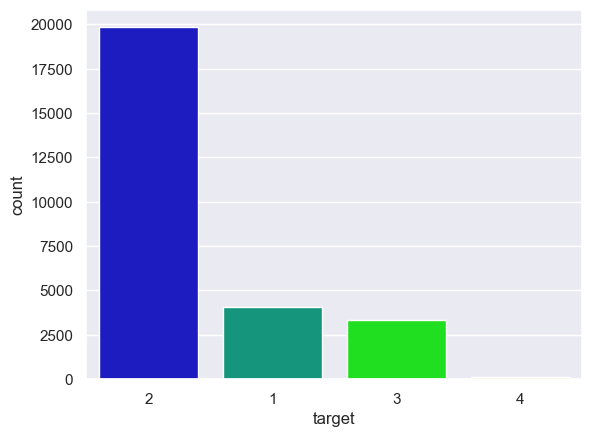

In [10]:
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

# Illustrate the imbalance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y, palette='nipy_spectral')
plt.show()

[('1', 19841), ('2', 19841), ('3', 19841), ('4', 19841)]


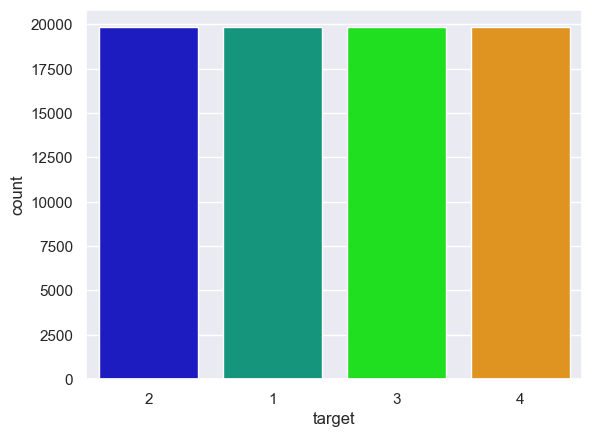

In [11]:
from imblearn.over_sampling import SMOTE

# Balance targets with Synthetic Minority Oversampling Technique
smote = SMOTE(random_state=0)
X, y = smote.fit_resample(X, y)

# Illustrate the balance between classification targets 
print(sorted(Counter(y).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y, hue=y,palette='nipy_spectral')
plt.show()

[<a href="#content">Back to top</a>]

## ML with Random Forest Classifier <a name="4"></a>

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data set into train and test parts 
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y,
                                                                      test_size=0.20,
                                                                      random_state=5, 
                                                                      shuffle=True) 
# # Standardise the data points
sc = StandardScaler()
X_train = sc.fit_transform(X_train_unscaled)
X_test = sc.transform(X_test_unscaled)

# Print the shape of each part
print("Shapes:")
print("X_train: ", X_train.shape)
print("X_test:  ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test:  ", y_test.shape)

Shapes:
X_train:  (63491, 59)
X_test:   (15873, 59)
y_train:  (63491,)
y_test:   (15873,)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, auc
from sklearn.multiclass import OneVsRestClassifier

# model = OneVsRestClassifier(RandomForestClassifier()).fit(X_train, y_train) 
model = RandomForestClassifier(random_state=1).fit(X_train, y_train) 

pred = model.predict(X_test) 
  
print("Accuracy:", round(accuracy_score(y_test, pred),3))

Accuracy: 0.914


In [14]:
from sklearn.model_selection import cross_val_score

clf = (RandomForestClassifier(random_state=1))
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
scores

array([0.81673282, 0.91501292, 0.92383292, 0.91564292, 0.89982359])

In [15]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.04


[<a href="#content">Back to top</a>]

## Overfitting exploration <a name="5"></a>

In [16]:
from sklearn.metrics import accuracy_score

# Evaluate random forest classifier performance on train and test sets with different tree depths
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model_ = RandomForestClassifier(#max_features="log2",
                                 # max_leaf_nodes=9,
                                 # n_estimators=150,
                                 max_depth=i) 
 # fit model_ on the training dataset
 model_.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model_.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model_.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.378, test: 0.381
>2, train: 0.413, test: 0.415
>3, train: 0.441, test: 0.445
>4, train: 0.492, test: 0.496
>5, train: 0.533, test: 0.532
>6, train: 0.575, test: 0.568
>7, train: 0.636, test: 0.616
>8, train: 0.692, test: 0.648
>9, train: 0.759, test: 0.696
>10, train: 0.826, test: 0.734
>11, train: 0.886, test: 0.772
>12, train: 0.931, test: 0.799
>13, train: 0.962, test: 0.828
>14, train: 0.979, test: 0.846
>15, train: 0.989, test: 0.863
>16, train: 0.995, test: 0.876
>17, train: 0.997, test: 0.883
>18, train: 0.999, test: 0.895
>19, train: 0.999, test: 0.897
>20, train: 1.000, test: 0.904


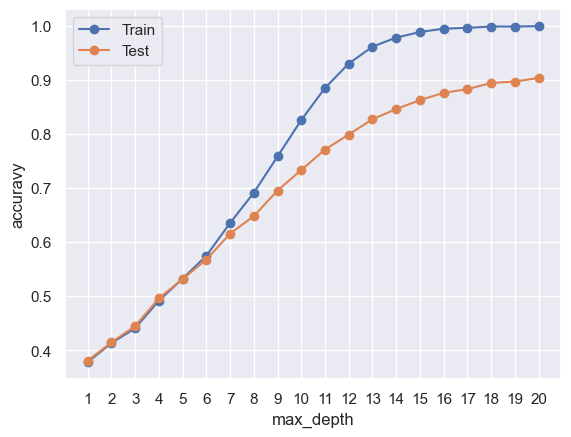

In [17]:
import math
import matplotlib.pyplot as plt

# Set integers for x axis
new_x_ticks = range(math.floor(min(values)), math.ceil(max(values))+1)
plt.xticks(new_x_ticks)
# Plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel("max_depth")
plt.ylabel("accuravy")
plt.show()

[<a href="#content">Back to top</a>]